In [1]:
%load_ext autoreload
%autoreload 2

# Starter Notebook

Use this notebook as a starting point for using the library.

## setup access token

We're using dotenv library here, alternatively you can simply set the environment variable as:
```
import os
os.environ["CODE_GENIE_TOKEN"] = "your-access-token-here"
```

Though it is not recommended to do so as notebooks are typically shared with others and you should keep your access token private.

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv("../../.env")  # replace with path to your env file

True

## setup cache

By default the package will cache genie invocations in a temp file. This would mean that any genies created will be lost once you restart the kernel or rerun the notebook at another time. to keep the cached genies, you can set a custom path where genies would be stored so that you will not lose them when you rerun the notebook.

If you would like to disable caching, you can set the option `cache_code` as `False` using the same method as below.

In [4]:
from code_genie import set_options
set_options({"cache_path": "./"})

## Create data

while you should import your own dataset, we can use code-genie to generate the data for this analysis

In [5]:
from code_genie.genie import Genie, PandasGenie

In [6]:
data_gen = Genie(instructions=["generate a pandas dataframe containing 100 rows with employee information with following columns:",
                               "id: random employee id",
                               "name: employee name",
                               "salary: salary per annum in USD",
                               "department: should be either engineering or product"],
                override=False)

In [12]:
print(data_gen.code)

import pandas as pd
import random

def generate_employee_df():
    # creating lists for random values
    id_list = [i+1 for i in range(100)]
    name_list = ['Employee'+str(i+1) for i in range(100)]
    salary_list = [random.randint(50000, 200000) for i in range(100)]
    department_list = ['engineering' if random.randint(0, 1) else 'product' for i in range(100)]
    
    # creating dataframe
    df = pd.DataFrame({'id': id_list, 
                       'name': name_list, 
                       'salary': salary_list, 
                       'department': department_list})
    
    return df


In [14]:
df = data_gen()
df.shape

(100, 4)

In [15]:
df.head()

id       name  salary   department
0   1  Employee1  135263  engineering
1   2  Employee2  162160  engineering
2   3  Employee3  199188      product
3   4  Employee4   79361  engineering
4   5  Employee5  154289      product

### add missing values

In [9]:
data_gen_add_missing = PandasGenie("make salaries for around 10% of the employees missing",
                                   columns=list(df.columns))

In [10]:
print(data_gen_add_missing.code)

import numpy as np
import pandas as pd

def add_missing_salaries(df):
    # get 10% of rows as integer
    num_missing = int(len(df)*0.1)
    # get list of random indices to set to NaN
    random_indices = np.random.choice(df.index, num_missing, replace=False)
    # set the chosen indices' salaries to NaN
    df.loc[random_indices, 'Salary'] = np.nan
    # return the updated dataframe
    return df



In [11]:
df_missing = data_gen_add_missing(df)

In [13]:
df_missing["Salary"].isnull().sum()

10

## Analyze data

### find number of missing values in each column

In [14]:
num_missing = PandasGenie("find number of missing values in each column")
print(num_missing.code)

import pandas as pd

def find_missing_values(df):
    num_missing = df.isna().sum()
    return num_missing



In [15]:
num_missing(df_missing)

ID             0
Name           0
Salary        10
Department     0
dtype: int64

### plot distribution of salary

In [21]:
dist_salary = PandasGenie("plot distribution of salary, create bins of 10K each", columns=df_missing.columns)

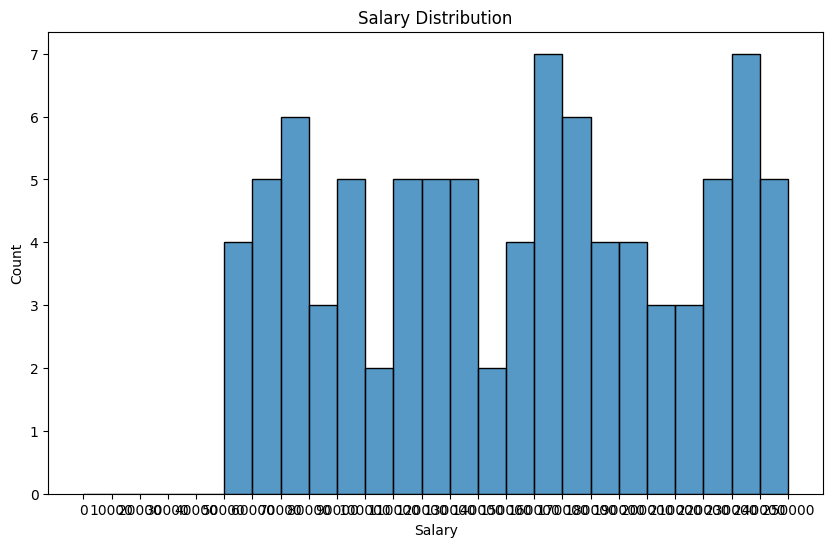

In [22]:
dist_salary(df_missing)

In [23]:
dept_salary = PandasGenie("make boxplots of salary grouped by department", columns=df_missing.columns)

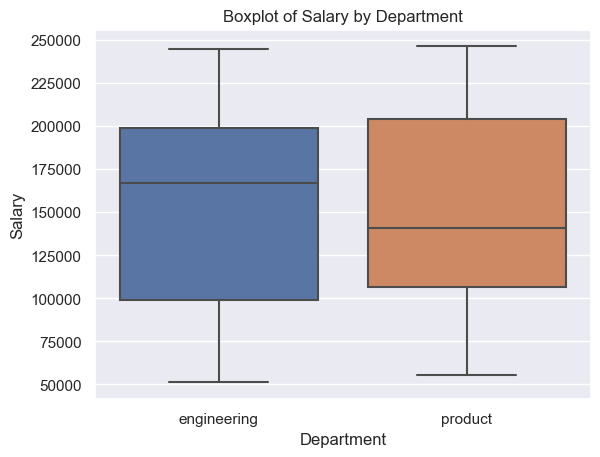

In [24]:
dept_salary(df_missing)

In [25]:
dept_100k = PandasGenie("how many people in each department make more than 100K?", columns=df_missing.columns)

In [26]:
dept_100k(df_missing)

Department
engineering    34
product        33
Name: ID, dtype: int64